<a href="https://colab.research.google.com/github/RobsonCrLira/AceleraDevDS/blob/master/Semana9/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/RobsonCrLira/AceleraDevDS/master/Semana8/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/RobsonCrLira/AceleraDevDS/master/Semana8/train.csv")

Verificando a dimensão dos datasets (Linha, Colunas)

In [ ]:
print("Test : ",test.shape)
print("Train : ",train.shape)

Test :  (4576, 47)
Train :  (13730, 167)


Verificando se as colunas do dataframe test pertence dataframe train

In [ ]:
print(set(test.columns).issubset(set(train.columns)))

True


In [ ]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [ ]:
col = list(test.columns)

In [ ]:
col.append('NU_NOTA_MT')

In [ ]:
train_2 = train[col]

In [ ]:
train_2.drop(columns=['CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','CO_PROVA_CN'],inplace=True)# Eliminando variaves que não possui dados relevantes ou ja veio transformado

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_2.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_

In [ ]:
train_2.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [ ]:
train_2.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
NU_NOTA_CN                float64
NU_NOTA_CH                float64
NU_NOTA_LC                float64
TP_LINGUA                   int64
TP_STATUS_REDACAO         float64
NU_NOTA_COMP1 

Q001 - Até que serie seu pai estudou? 

Q002 - Até que serie sua mae estudou?

Q006 - Qual é a renda de sua Familia? *Transformado*

Q024 - Na sua Residencia tem computador? *Transformado*

Q025 - Na sua Residencia tem acesso a internet? *Transformado* 

Q026 - Você exerce ou ja exerceu atividade remunerada? 

Q027 - Com que idade você comeceu a exercer atividade remunerada? 

Q047 - Em que tipo de escola você frequentou o ensino medio 

Levando em consideração as perguntas acima que foram levantada no questinario de cadastro do enem vou tentar transforma-los em valoress numerico para facilitar a analise

In [ ]:
train_2[['Q001','Q002','Q006','Q024','Q025','Q026','Q027','Q047']].isna().sum()

Q001       0
Q002       0
Q006       0
Q024       0
Q025       0
Q026       0
Q027    7373
Q047       0
dtype: int64

In [ ]:
#Questão 6
def transforma_006(valor):
  if valor == 'B':
    return 880.00
  elif valor == 'C':
    return 1320.00
  elif valor == 'D':
    return 1760.00
  elif valor == 'E':
    return 2200.00
  elif valor == 'F':
    return 2640.00
  elif valor == 'G':
    return 3520.00
  elif valor == 'H':
    return 4400.00
  elif valor == 'I':
    return 5280.00
  elif valor == 'J':
    return 6160.00
  elif valor == 'K':
    return 7040.00
  elif valor == 'L':
    return 7920.00
  elif valor == 'M':
    return 8800.00
  elif valor == 'N':
    return 10560.00
  elif valor == 'O':
    return 13200.00
  elif valor == 'P':
    return 17600.00
  elif valor == 'Q':
    return 17600.01
  else:
    return 0


#Questão 24
def transforma_024(valor):
  if valor == 'B':
    return 1
  elif valor == 'C':
    return 2
  elif valor == 'D':
    return 3
  elif valor == 'E':
    return 4
  else:
    return 0


#Questão 25 - A == Não // B == Sim
def transforma_025(valor):
  if valor == 'A':
    return 0
  else:
    return 1

#Transformação de Sexo
def transforma_sexo(valor):
  if valor == 'F':
    return 0
  else:
    return 1

In [ ]:
train_2['Q006_Renda'] = train_2.Q006.map(transforma_006)
train_2['Q024_PC_Quantidade'] = train_2.Q024.map(transforma_024)
train_2['Q025_Internet_Binario'] = train_2.Q025.map(transforma_025)
train_2['TP_SEXO_Binario'] = train_2.TP_SEXO.map(transforma_sexo)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test['Q006_Renda'] = test.Q006.map(transforma_006)
test['Q024_PC_Quantidade'] = test.Q024.map(transforma_024)
test['Q025_Binario'] = test.Q025.map(transforma_025)
test['TP_SEXO_Binario'] = test.TP_SEXO.map(transforma_sexo)

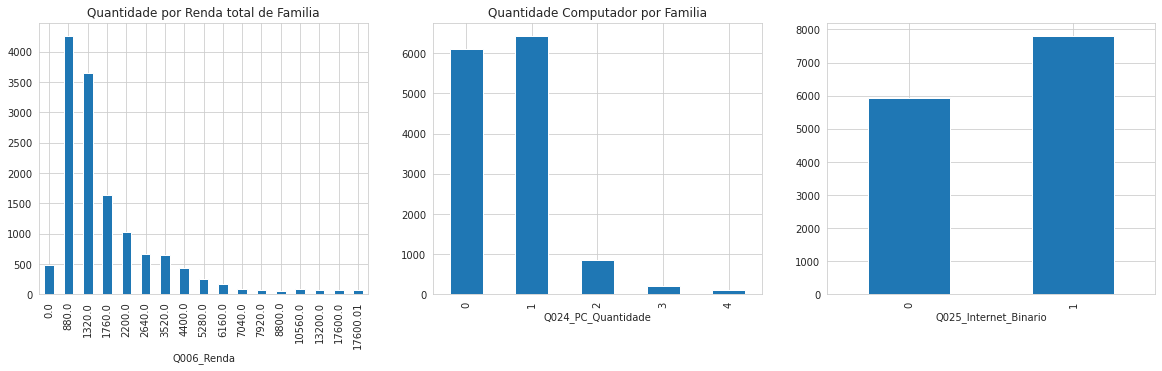

In [ ]:
sns.set_style('whitegrid')

f , axes = plt.subplots(1,3, figsize=(20,5))

df_renda = train_2.groupby('Q006_Renda')['Q006_Renda'].count().sort_index()
df_renda.plot(kind='bar', title ='Quantidade por Renda total de Familia', ax=axes[0])

df_pc = train_2.groupby('Q024_PC_Quantidade')['Q024_PC_Quantidade'].count().sort_index()
df_pc.plot(kind='bar', title ='Quantidade Computador por Familia', ax=axes[1])

df_pc = train_2.groupby('Q025_Internet_Binario')['Q025_Internet_Binario'].count().sort_index()
df_pc.plot(kind='bar', ax=axes[2])


In [ ]:
train_2.select_dtypes(include=object)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,RS,M,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,CE,F,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,CE,F,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,RJ,F,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,AM,M,E,D,C,A,A,B,F,A
...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,SP,M,E,E,G,B,B,B,C,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,PE,F,A,A,C,A,B,B,I,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,RS,F,C,G,B,A,B,A,NaN,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,RJ,M,B,D,G,B,B,C,E,A


In [ ]:
corr = train_2.corr()
selecao = corr.NU_NOTA_MT> 0.3
aux = list(selecao[selecao == True].index) # Possui boa Coorrelação
aux2 = list(selecao[selecao == False].index)# Possui má Coorrelação
aux

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'NU_NOTA_MT',
 'Q006_Renda',
 'Q024_PC_Quantidade']

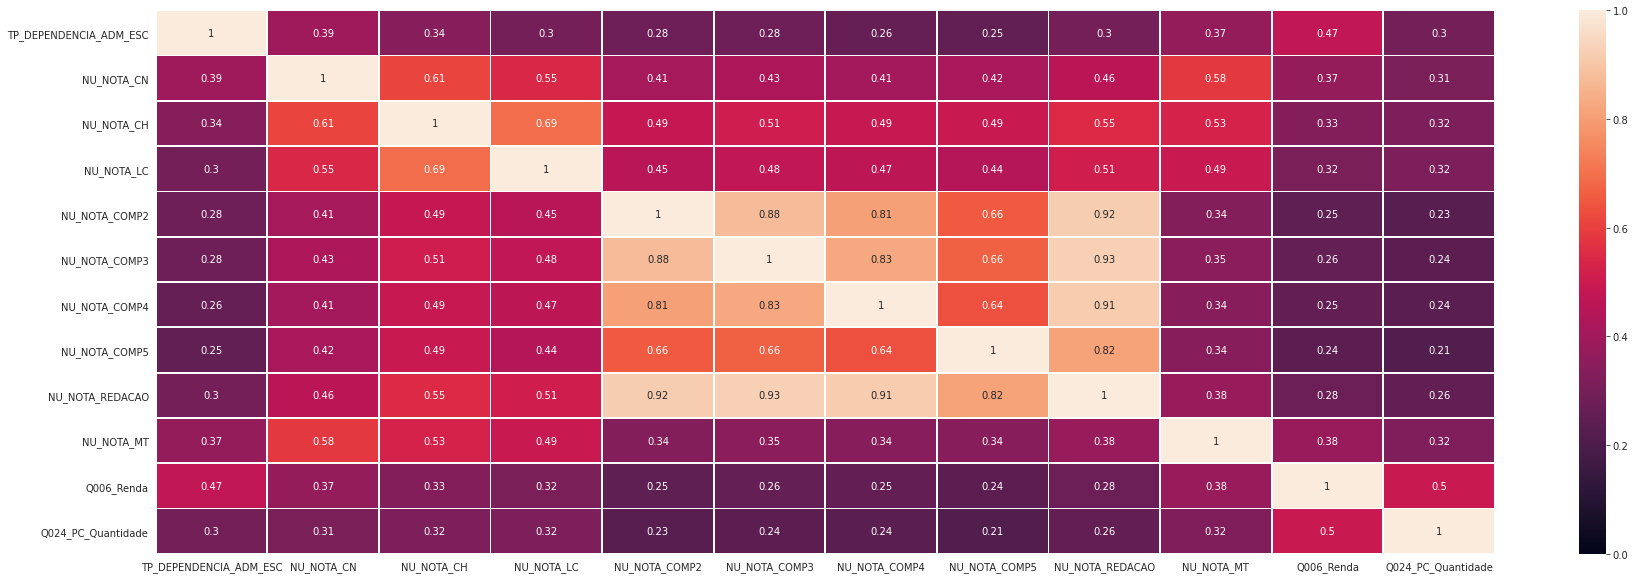

In [ ]:
corr = train_2[aux].corr()
sns.set_style('whitegrid')
axes = plt.subplots(figsize=(30,10))
sns.heatmap(corr,linewidths=.8,annot=True ,vmin=0,vmax=1)

In [ ]:
feature_selection_0  = aux

In [ ]:
train_2['NU_NOTA_MEDIA'] = (train_2.NU_NOTA_CH + train_2.NU_NOTA_CN + train_2.NU_NOTA_LC + train_2.NU_NOTA_MT + train_2.NU_NOTA_REDACAO) / 5.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


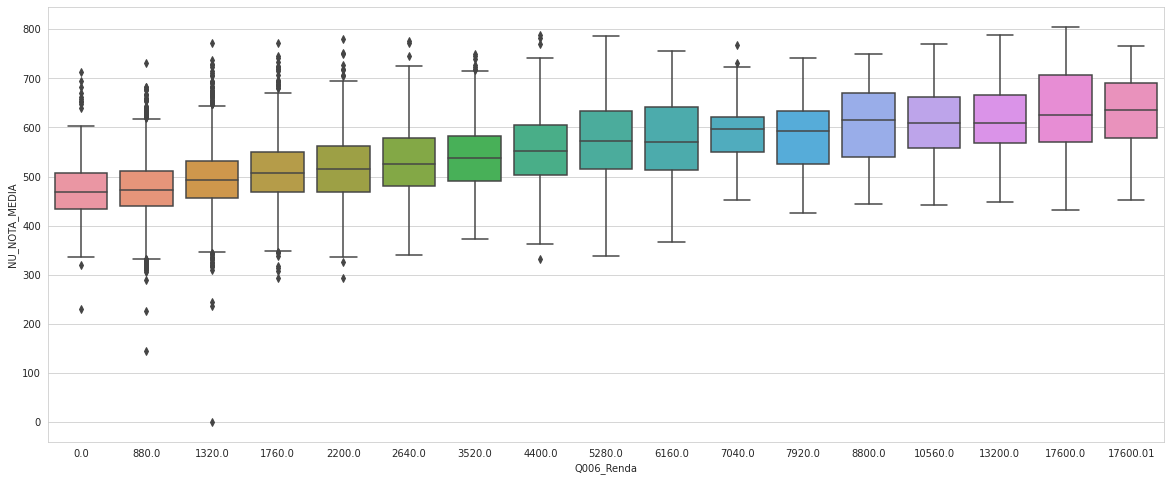

In [ ]:
axes = plt.subplots(figsize=(20,8))
sns.boxplot(x='Q006_Renda',y='NU_NOTA_MEDIA',data=train_2)

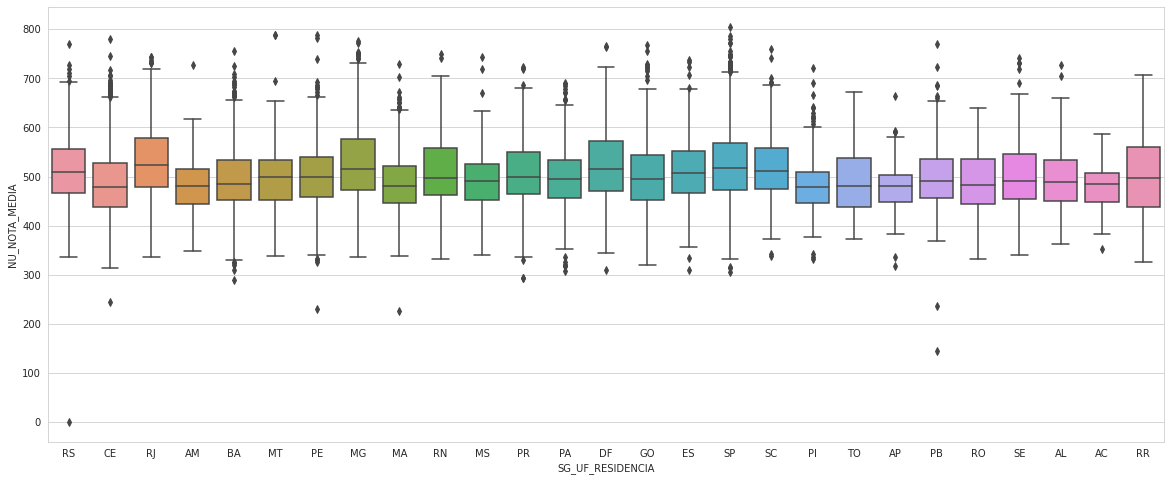

In [ ]:
axes = plt.subplots(figsize=(20,8))
sns.boxplot(x='SG_UF_RESIDENCIA',y='NU_NOTA_MEDIA',data=train_2)

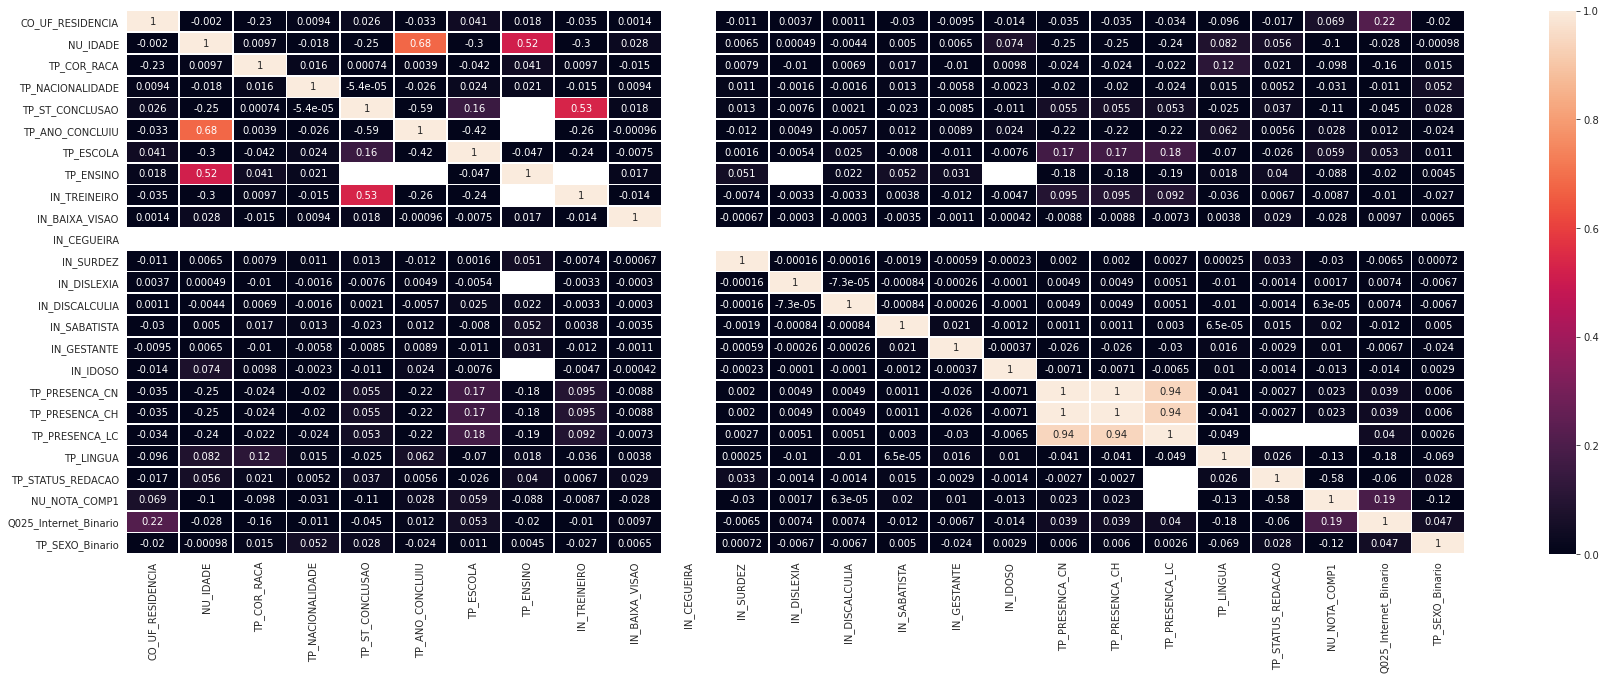

In [ ]:
corr = train_2[aux2].corr()
sns.set_style('whitegrid')
axes = plt.subplots(figsize=(30,10))
sns.heatmap(corr,linewidths=.8,annot=True ,vmin=0,vmax=1)

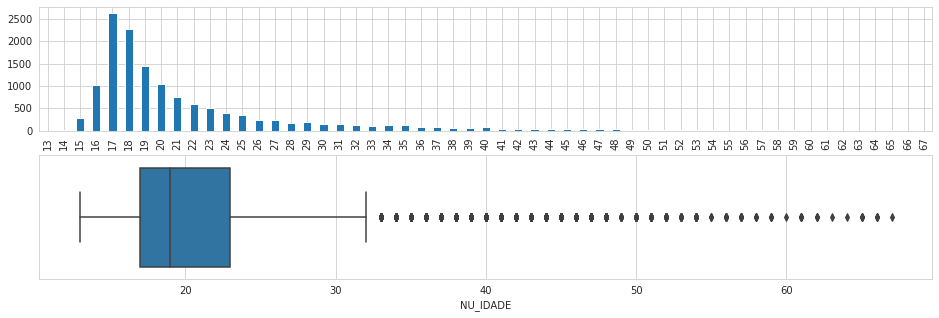

In [ ]:
f, axes = plt.subplots(2,1,figsize=(16,5))
idade = train_2.groupby('NU_IDADE')['NU_IDADE'].count()
idade.plot(kind='bar',ax = axes[0])
sns.boxplot(train_2.NU_IDADE,ax=axes[1] )

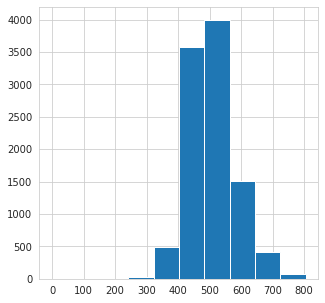

In [ ]:
axes = plt.subplots(figsize=(5,5))
train_2['NU_NOTA_MEDIA'].hist()

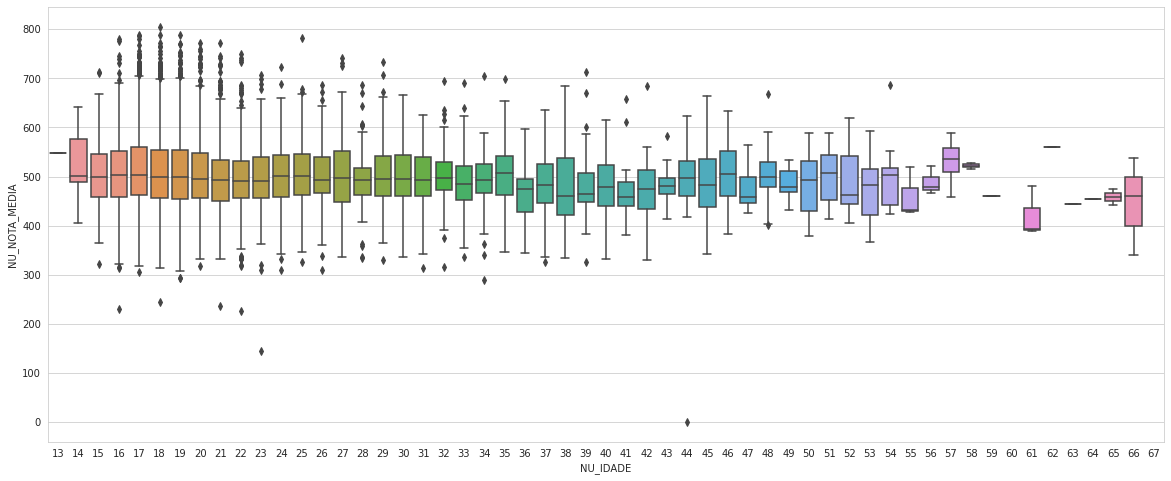

In [ ]:
axes = plt.subplots(figsize=(20,8))
sns.boxplot(x='NU_IDADE',y='NU_NOTA_MEDIA',data=train_2)

In [ ]:
import string
ordem = list(string.ascii_uppercase[:17])

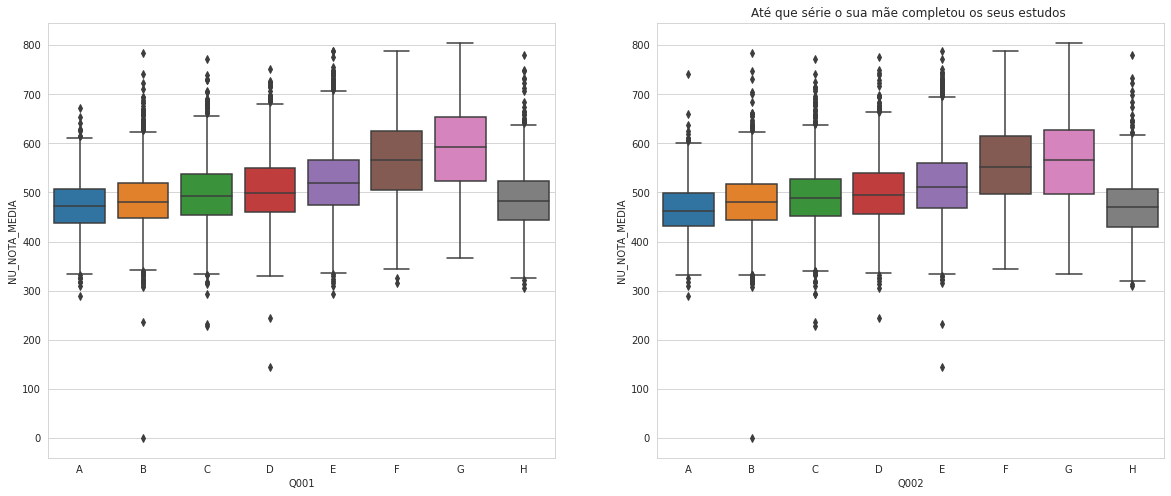

In [ ]:
f , axes = plt.subplots(1,2 ,figsize=(20,8))
plt.title("Até que série o seu pai completou os seus estudos ")
sns.boxplot(x='Q001',y='NU_NOTA_MEDIA',data=train_2, order=ordem[:8],ax=axes[0])
plt.title("Até que série o sua mãe completou os seus estudos ")
sns.boxplot(x='Q002',y='NU_NOTA_MEDIA',data=train_2, order=ordem[:8],ax=axes[1])

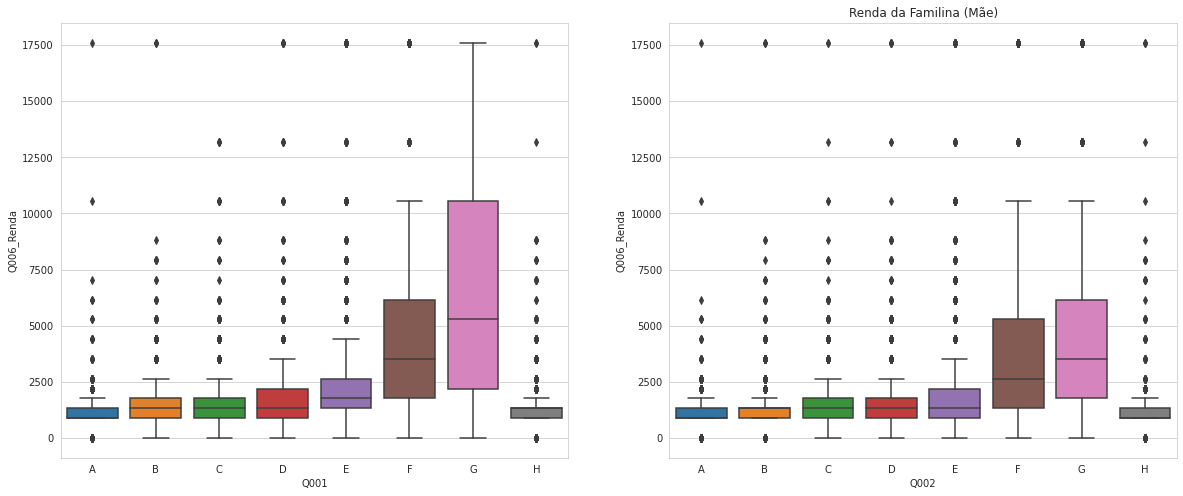

In [ ]:
f , axes = plt.subplots(1,2 ,figsize=(20,8))
plt.title("Renda da familia (PAI)")
sns.boxplot(x='Q001',y='Q006_Renda',data=train_2, order=ordem[:8],ax=axes[0])
plt.title("Renda da Familina (Mãe)")
sns.boxplot(x='Q002',y='Q006_Renda',data=train_2, order=ordem[:8],ax=axes[1])

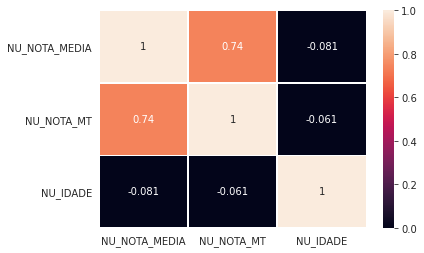

In [ ]:
corr = train_2[['NU_NOTA_MEDIA', 'NU_NOTA_MT','NU_IDADE']].corr()
sns.set_style('whitegrid')
sns.heatmap(corr,linewidths=.8,annot=True ,vmin=0,vmax=1)

In [ ]:
feature_selection_0.append('NU_NOTA_MEDIA')
feature_selection_0

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'NU_NOTA_MT',
 'Q006_Renda',
 'Q024_PC_Quantidade',
 'NU_NOTA_MEDIA']

In [ ]:
feature_selection_1 = ['TP_DEPENDENCIA_ADM_ESC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_COMP2','NU_NOTA_COMP3',
                        'NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO', 'Q006_Renda','Q024_PC_Quantidade']
feature_selection_1

['TP_DEPENDENCIA_ADM_ESC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q006_Renda',
 'Q024_PC_Quantidade']

In [ ]:
train_2[feature_selection_1].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
Q006_Renda                   0
Q024_PC_Quantidade           0
dtype: int64

In [ ]:
dados_nulos = pd.DataFrame({'Colunas': feature_selection_1,
                            'Total': train_2[feature_selection_1].isnull().sum(),
                            'Porcentagem': train_2[feature_selection_1].isnull().sum() / train_2[feature_selection_1].isnull().count()})
dados_nulos

,Colunas,Total,Porcentagem
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,9448,0.688128
NU_NOTA_CN,NU_NOTA_CN,3389,0.246832
NU_NOTA_CH,NU_NOTA_CH,3389,0.246832
NU_NOTA_LC,NU_NOTA_LC,3597,0.261981
NU_NOTA_COMP2,NU_NOTA_COMP2,3597,0.261981
NU_NOTA_COMP3,NU_NOTA_COMP3,3597,0.261981
NU_NOTA_COMP4,NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP5,NU_NOTA_COMP5,3597,0.261981
NU_NOTA_REDACAO,NU_NOTA_REDACAO,3597,0.261981
Q006_Renda,Q006_Renda,0,0.000000


In [ ]:
def zeroFill(data):
  for  item in feature_selection_0:
    data[item] = data[item].fillna(0)
  return data

In [ ]:
df_train = zeroFill(train_2)
df_test = test.fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dados_nulos = pd.DataFrame({'Colunas': feature_selection_1,
                            'Total': train_2[feature_selection_1].isnull().sum(),
                            'Porcentagem': train_2[feature_selection_1].isnull().sum() / train_2[feature_selection_1].isnull().count()})
dados_nulos.head()

,Colunas,Total,Porcentagem
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,0,0.0
NU_NOTA_CN,NU_NOTA_CN,0,0.0
NU_NOTA_CH,NU_NOTA_CH,0,0.0
NU_NOTA_LC,NU_NOTA_LC,0,0.0
NU_NOTA_COMP2,NU_NOTA_COMP2,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train[feature_selection_1], df_train.NU_NOTA_MT, test_size=0.05) 

In [ ]:
X_train.shape

(13043, 11)

In [ ]:
X_test.shape

(687, 11)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()


In [ ]:
from sklearn import tree

model2 = tree.DecisionTreeRegressor()

In [ ]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
def analise_erro(model, x_test1,y_test1, x_train1,y_train1, y_pred_test1,y_pred_train1):
  print("Analise de erro - Test")
  print("")
  print("MAE : ",metrics.mean_absolute_error(y_test1, y_pred_test1))
  print("MSE : ",metrics.mean_squared_error(y_test1, y_pred_test1))
  print("R^2 : ", r2_score(y_test1,y_pred_test1))
  print("Cross Validation: {}".format(round(cross_val_score(model,x_test1,y_test1).mean(),2)))
  print("")
  print("")
  print("Analise de erro - Train")
  print("")
  print("MAE : ",metrics.mean_absolute_error(y_train1, y_pred_train1))
  print("MSE : ",metrics.mean_squared_error(y_train, y_pred_train1))
  print("R^2 : ", r2_score(y_train1,y_pred_train1))
  print("Cross Validation: {}".format(round(cross_val_score(model,x_test1,y_test1).mean(),2)))
  #plt.figure(figsize=(10,10))
  #sns.scatterplot(x=y_test1.values,y=y_pred_test1)
  #plt.show()

In [ ]:
y_test.isnull().sum()

0

In [ ]:
model1.fit(X_train,y_train)

y_test_pred_model1 = model1.predict(X_test)
y_train_pred_model1 = model1.predict(X_train)

In [ ]:
model2.fit(X_train,y_train)

y_test_pred_model2 = model2.predict(X_test)
y_train_pred_model2 = model2.predict(X_train)

In [ ]:
model3.fit(X_train,y_train)

y_test_pred_model3 = model3.predict(X_test)
y_train_pred_model3 = model3.predict(X_train)

In [ ]:
analise_erro(model1,X_test,y_test,X_train,y_train,y_test_pred_model1,y_train_pred_model1)

Analise de erro - Test

MAE :  45.63306695778748
MSE :  4543.557538248908
R^2 :  0.916894710538814
Cross Validation: 0.91


Analise de erro - Train

MAE :  16.2093417925324
MSE :  576.3724582196584
R^2 :  0.9889677507263257
Cross Validation: 0.91


In [ ]:
analise_erro(model2,X_test,y_test,X_train,y_train,y_test_pred_model2,y_train_pred_model2)

Analise de erro - Test

MAE :  63.25487627365357
MSE :  9180.845138282388
R^2 :  0.8320750235267556
Cross Validation: 0.84


Analise de erro - Train

MAE :  0.0
MSE :  0.0
R^2 :  1.0
Cross Validation: 0.84


In [ ]:
analise_erro(model3,X_test,y_test,X_train,y_train,y_test_pred_model3,y_train_pred_model3)

Analise de erro - Test

MAE :  51.92765120981617
MSE :  5291.0206891028465
R^2 :  0.9032230136382335
Cross Validation: 0.9


Analise de erro - Train

MAE :  49.767066724263934
MSE :  4938.137556459843
R^2 :  0.9054799310868602
Cross Validation: 0.9


In [ ]:
x = df_test[feature_selection_1]

In [ ]:
x.isna().sum()

TP_DEPENDENCIA_ADM_ESC    0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
Q006_Renda                0
Q024_PC_Quantidade        0
dtype: int64

In [ ]:
answer = model2.predict(x)

In [ ]:
answer_1 = pd.DataFrame({'NU_INSCRICAO': df_test.NU_INSCRICAO,
                         'NU_NOTA_MT': answer})

In [ ]:
resposta = answer_1.set_index('NU_INSCRICAO')

In [ ]:
resposta.to_csv('answer.csv')